In [ ]:
#Import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
# Check for null values(column wise)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Information about columns includes name, not null count and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Display the rows and columns
df.shape

(1338, 7)

In [ ]:
# Display the first 10 records from dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Describe the dataset for max,min,quartiles,median,count,etc.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check unique values for each column
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# Finding categorical description of column sex
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
# Finding categorical description of column region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Check minimum values for each column
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [ ]:
# Check maximum values for each column
df.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [ ]:
data1=df.groupby(['region']).sum()
print(data1)

             age        bmi  children       charges
region                                             
northeast  12723   9452.215       339  4.343669e+06
northwest  12739   9489.930       373  4.035712e+06
southeast  14174  12141.580       382  5.363690e+06
southwest  12823   9943.900       371  4.012755e+06


<ipython-input-11-cfd191760710>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1=df.groupby(['region']).sum()


**Univariate Analysis**



<Axes: ylabel='bmi'>

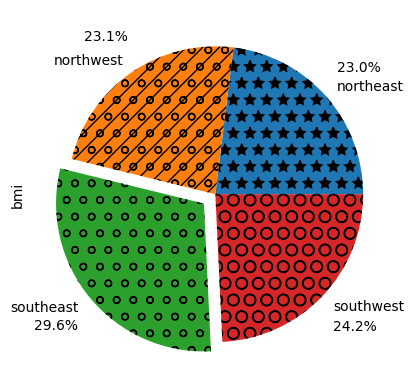

In [ ]:
# 3. What does the distribution of 'bmi' values in this dataset indicate.

#pie chart
data1["bmi"].plot.pie(autopct="%1.1f%%",hatch=['*','/o/','o','O'],explode=[0,0,0.1,0],pctdistance=1.3)

From the above pie chart,it shows the distribution of 'bmi' values and is annotated with percentage values and patterns. Here are some insights and a question related to this plot:

Insights:
    The majority of the 'bmi' values fall within the 'o' and '*' patterned segments.
    Approximately 10.0% of the 'bmi' values have a slightly larger 'explode' effect compared to the rest.

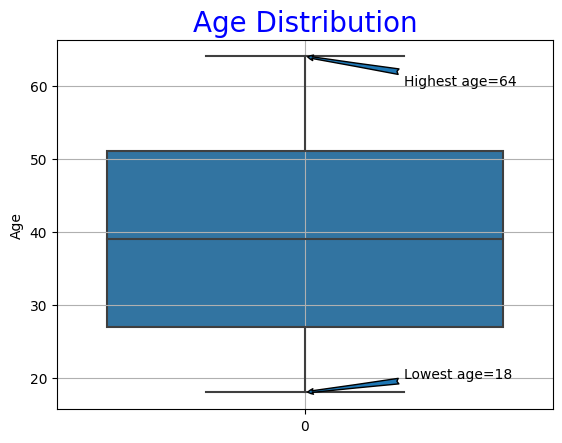

In [ ]:
# 2.What is the median, range and outliers of ages in the dataset?

sns.boxplot(df['age'])
plt.annotate('Highest age=64',(0,64),xytext=(0.2,60),arrowprops=dict(arrowstyle='fancy'))
plt.annotate('Lowest age=18',(0,18),xytext=(0.2,20),arrowprops=dict(arrowstyle='fancy'))
plt.grid(True)
plt.ylabel('Age')
plt.title('Age Distribution',fontsize=20,color='blue')
plt.show()

Insights :-

Age Range: The boxplot visualizes the age distribution within your dataset. The boxes represent the interquartile range (IQR), where the bulk of the data lies, and the whiskers extend to the minimum and maximum values within 1.5 times the IQR. In this case, the highest age is 64, and the lowest age is 18.

Outliers: You can identify potential outliers as points beyond the whiskers of the boxplot. In this plot, there may be outliers with ages higher or lower than the typical age range.

Central Tendency: The line within the box represents the median age, which is the middle value of the dataset when it's sorted. The median age seems to be around 40-45 years.

Spread of Data: The height of the box indicates the spread of the middle 50% of the data, and you can see that the data is somewhat evenly distributed within this range.

Data Distribution: The shape of the boxplot can provide insights into the distribution of age data. In this case, it suggests that the age distribution is somewhat symmetrical.

Variability: The range between the highest and lowest ages, as well as the length of the whiskers, can give you an idea of the variability in the age data.

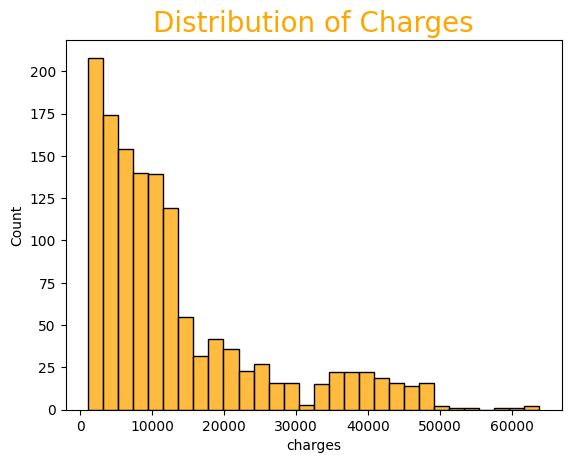

In [ ]:
# 3.What is the most common range of healthcare charges in the dataset, and how does it vary?

sns.histplot(x='charges',data=df,color='orange')
plt.title('Distribution of Charges',fontsize=20,color='orange')
plt.show()

*Insights :- *

Data Distribution: The histogram shows how the 'charges' data is distributed. The x-axis represents different ranges or values of charges, while the y-axis shows how many data points fall within each range.

Central Tendency: The plot can provide insights into the central tendency of the charges. If the histogram has a peak, it indicates a common or central charge value that occurs frequently.

Spread of Data: The width and shape of the histogram reveal how the charges are spread. A wider distribution suggests a broader range of charges, while a narrow distribution means most charges are close to each other.

Outliers: Unusual or extreme charge values that are far from the bulk of the data can be identified. Outliers may appear as isolated bars far from the main distribution.

Overall Pattern: The overall pattern of the histogram helps understand whether charges are concentrated in a specific range or if they are evenly spread out.

**Bivarite ANalysis**

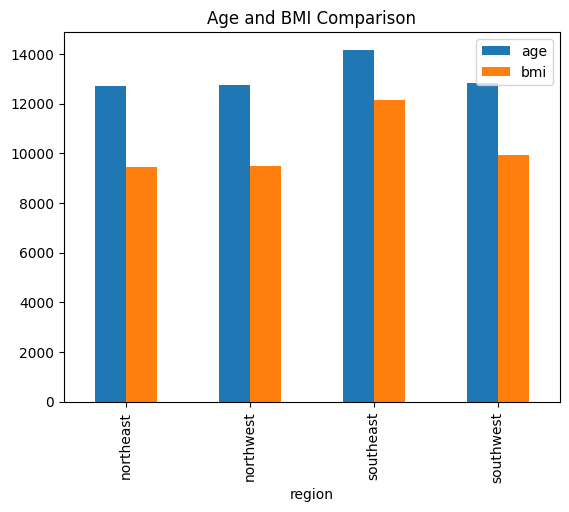

In [ ]:
# 4. How do 'age' and 'bmi' vary across different groups or categories?

data1[["age","bmi"]].plot.bar(title="Age and BMI Comparison").legend(loc='upper right')

Insights: The plot compares 'age' and 'bmi' for each category. It shows that, on average, 'bmi' tends to be higher than 'age' for each category.

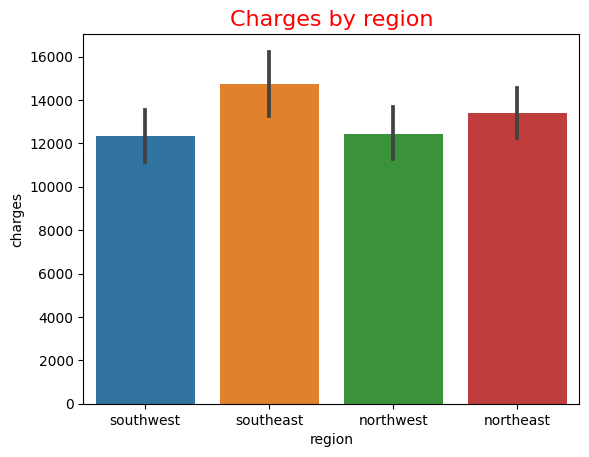

In [ ]:
# 5. In which do healthcare charges appear to be the highest on average and how does it compare to other regions.
sns.barplot(x='region',y='charges',data=df)
plt.title('Charges by region',color='red',fontsize=16)
plt.show()

**  Insights :- **
   
  Regional Variations: The plot shows that charges for healthcare services differ across various regions.

  Highest Charges: You can identify the region with the highest charges, which can indicate areas where healthcare costs are relatively more expensive.

  Lowest Charges: The region with the lowest charges stands out, suggesting areas where healthcare costs are more affordable.

  Comparison: By comparing the bar heights, you can get a sense of how charges in different regions stack up against each other.

  Potential Patterns: If there are consistent patterns or trends in charges by region, they may indicate underlying factors like the cost of living, healthcare quality, or insurance coverage in those areas.

  Data Exploration: This plot serves as a starting point for exploring healthcare cost disparities across regions, which can be important for healthcare planning, policy, and decision-making.

**Mutivarite Analysis**

<ipython-input-76-c5067c038419>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region',y='charges',data=df,hue='smoker', ci=None, palette='Set2')


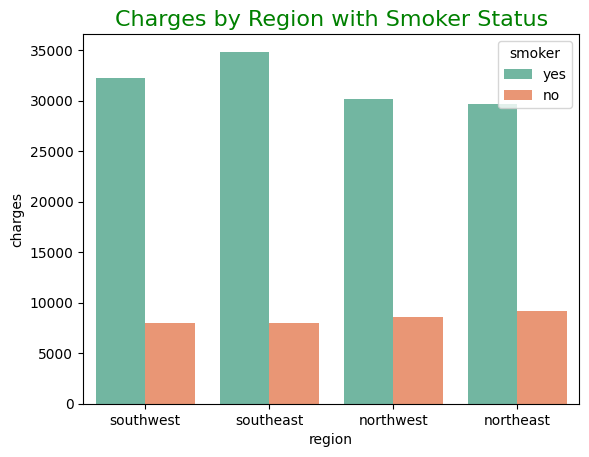

In [ ]:
#6.Is there a notable difference in healthcare charges between smokers and non-smokers in each region?

sns.barplot(x='region',y='charges',data=df,hue='smoker', ci=None, palette='Set2')
plt.title('Charges by Region with Smoker Status',color='green',fontsize=16)
plt.show()

**Insights :- **

The relationship between 'region' and 'charges', with the data separated by 'smoker' status. Here are some insights you can derive from this plot:

Charges Distribution by Region: The bar plot allows you to compare the distribution of charges across different regions. You can see how charges vary between the regions.

Impact of Smoking Status: By using the 'hue' parameter to separate the bars by smoker status, you can compare how charges differ for smokers and non-smokers within each region. It's evident that smokers tend to have higher charges in most regions.

Variability in Charges: The length of the bars indicates the range of charges in each region. Longer bars indicate greater variability in charges, while shorter bars suggest charges are more consistent within that region.

Regions with High and Low Charges: By examining the heights of the bars, you can identify which regions have the highest and lowest charges. This information can be useful for further investigation or decision-making.

Data Distribution: The color differentiation between smokers and non-smokers in each region is a helpful visual cue to quickly grasp the distribution of charges. This makes it easier to compare and draw conclusions.

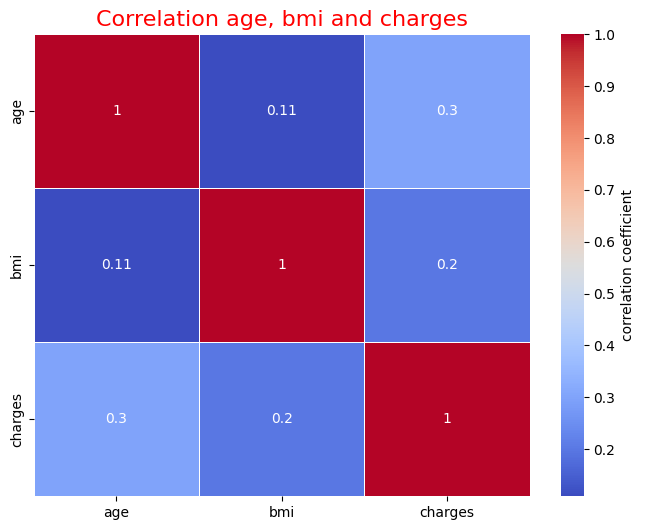

In [ ]:
# 7.Is there a relationship between age and BMI?

df1=df[['age','bmi','charges']]
correlation_matrix=df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,cbar_kws={'label':'correlation coefficient'})
plt.title('Correlation age, bmi and charges',color='red',fontsize=16)
plt.show()

**Insights :- **

The above heatmap is created using the correlation matrix of the 'age,' 'bmi,' and 'charges' columns from the DataFrame can provide insights into the relationships between these variables. Here are some key insights you can derive from the heatmap:

 Age and Charges: The heatmap shows a moderate positive correlation between
'age' and 'charges.' As 'age' increases, 'charges' tend to increase, indicating that older individuals tend to have higher medical charges.

BMI and Charges: The heatmap also reveals a moderate positive correlation between 'bmi' and 'charges.' Higher BMIs are associated with higher medical charges, suggesting that individuals with higher BMIs tend to have more costly healthcare.

Age and BMI: The heatmap indicates a weak correlation between 'age' and 'bmi.' This implies that there isn't a strong linear relationship between a person's age and their BMI.

In summary, this heatmap provides valuable insights into how these three variables are correlated. It suggests that both age and BMI have a moderate positive correlation with medical charges, meaning that they could be contributing factors to the cost of healthcare. These insights can be valuable for understanding and potentially predicting healthcare costs within your dataset.

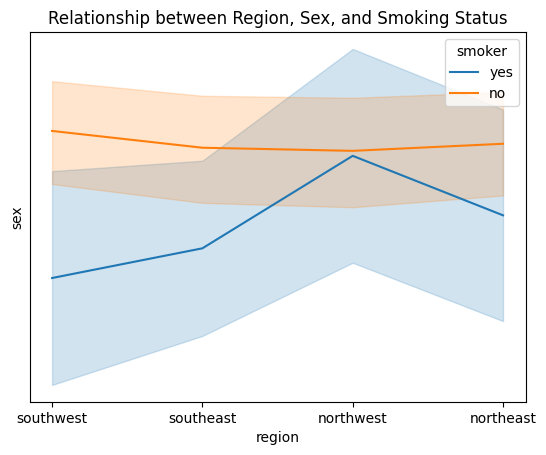

In [ ]:
# 8.What are the proportions of smokers and non-smokers in different regions and among different genders?

sns.lineplot(x='region',y='sex',data=df,hue='smoker')
plt.title('Relationship between Region, Sex, and Smoking Status')
plt.show()

**Insights :- **

Different Smoking Status: The lines in the plot show the relationship between 'Region' and 'Sex' for different categories of 'Smoker' (e.g., smokers and non-smokers). Each line represents a different category of 'Smoker,' allowing you to see how 'Region' and 'Sex' vary within these categories.

Comparison Across Regions: By looking at the lines for different regions, you can compare how 'Sex' is distributed within each region. For instance, you can observe if there are differences in the proportion of males and females in different regions.

Impact of Smoking Status: The use of different colors (one color for smokers and another for non-smokers) allows you to see how 'Smoker' status might influence the relationship between 'Region' and 'Sex.' For instance, you can see if there are differences in the distribution of male and female smokers across regions.

In simple words, this plot helps you visually explore how 'Region,' 'Sex,' and 'Smoker' status are related and if there are any noticeable patterns or differences between these variables. It can be useful for identifying trends or relationships within your dataset.


Age: The age of the individuals in the dataset ranges from 18 to 60, with the average age being around 39. This age distribution reflects a wide range of people, likely including both young and older adults.

Sex: The dataset includes both male and female individuals. It would be interesting to analyze if there are any gender-based differences in insurance charges, perhaps due to different health needs or behaviors.

BMI (Body Mass Index): The BMI values range from 22.705 to 33.770, indicating variation in the individuals' body weight and potential health risks. Higher BMIs can lead to higher health care costs and insurance charges.

Children: The number of children per individual varies from 0 to 3. It's important to consider whether having children affects insurance charges, as family size often influences health care needs.

Smoker: The dataset includes both smokers and non-smokers. Smoking is a well-known risk factor for various health conditions, so it's expected that smokers might have higher insurance charges compared to non-smokers.

Region: The dataset contains information about the individuals' regions, including Southwest, Southeast, Northwest, and Northeast. Regional differences may affect the cost of healthcare and, subsequently, insurance charges.

Insurance Charges: The insurance charges (premiums) vary significantly among the individuals, with the charges ranging from approximately $1,725 to over $28,923. Several factors, such as age, smoking status, BMI, and region, likely influence these charges.

Correlation: It would be valuable to perform a correlation analysis to understand how these factors (age, BMI, number of children, smoking status) correlate with insurance charges. For instance, it's expected that older individuals and smokers might have higher insurance charges.

Regression Analysis: You could also perform a regression analysis to build a predictive model for insurance charges based on the available features in the dataset. This can help insurers and individuals better estimate their insurance costs.

Policy Insights: The conclusions drawn from this dataset could inform insurance companies in setting appropriate premiums based on risk factors and guide individuals in understanding how their personal characteristics might influence their insurance costs.

Overall, this dataset is rich with information that can be used for various analytical and predictive purposes in the context of health insurance.